In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

In [2]:
# Read in csv file
df = pd.read_csv('state_data.csv')
df.columns

Index(['State', 'Sector', 'Year', 'Employment (2012=100)',
       'Employment (percent change)', 'Hourly labor compensation (2012=100)',
       'Hourly labor compensation (percent change)',
       'Hourly labor compensation cost ($/hour)',
       'Hourly labor compensation cost (percent change)', 'Hours (2012=100)',
       'Hours (percent change)', 'Implicit output deflator (2012=100)',
       'Implicit output deflator (percent change)',
       'Labor compensation (2012=100)', 'Labor compensation (percent change)',
       'Labor compensation cost (million $)',
       'Labor compensation cost (percent change)',
       'Labor productivity (2012=100)', 'Labor productivity (percent change)',
       'Number of employees (percent change)',
       'Number of employees (thousands)', 'Number of hours (millions)',
       'Number of hours (percent change)', 'Output (2012=100)',
       'Output (percent change)', 'Output per employee (2012=100)',
       'Output per employee (percent change)',
     

In [3]:
# Review Dataframe 
df.head()

,State,Sector,Year,Employment (2012=100),Employment (percent change),Hourly labor compensation (2012=100),Hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change),Hours (2012=100),...,Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Real labor compensation (2012=100),Real labor compensation (percent change),Real labor compensation cost (million $),Real labor compensation cost (percent change),Unit labor cost (2012=100),Unit labor cost (percent change),Value of production (million $),Value of production (percent change)
0,Alabama,Private Nonfarm,2007,109.312,NaN,88.207,NaN,25.104,NaN,111.179,...,31.919,NaN,109.487,NaN,100544.415,NaN,97.717,NaN,131017.921,NaN
1,Alabama,Private Nonfarm,2008,105.771,-3.2,92.369,4.7,26.289,4.7,105.856,...,32.176,0.8,105.084,-4.0,96501.227,-4.0,98.359,0.7,132265.709,1.0
2,Alabama,Private Nonfarm,2009,99.487,-5.9,97.805,5.9,27.836,5.9,95.843,...,34.219,6.3,101.187,-3.7,92922.613,-3.7,100.466,2.1,125856.079,-4.8
3,Alabama,Private Nonfarm,2010,99.046,-0.4,99.169,1.4,28.224,1.4,96.281,...,33.961,-0.8,100.882,-0.3,92642.114,-0.3,99.045,-1.4,131441.376,4.4
4,Alabama,Private Nonfarm,2011,98.814,-0.2,101.158,2.0,28.790,2.0,96.638,...,33.666,-0.9,100.377,-0.5,92178.639,-0.5,99.136,0.1,137342.683,4.5


In [4]:
# Drop rows with NaN from dataframe
df = df.dropna(how='any')

In [5]:
df.head()

,State,Sector,Year,Employment (2012=100),Employment (percent change),Hourly labor compensation (2012=100),Hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change),Hours (2012=100),...,Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Real labor compensation (2012=100),Real labor compensation (percent change),Real labor compensation cost (million $),Real labor compensation cost (percent change),Unit labor cost (2012=100),Unit labor cost (percent change),Value of production (million $),Value of production (percent change)
1,Alabama,Private Nonfarm,2008,105.771,-3.2,92.369,4.7,26.289,4.7,105.856,...,32.176,0.8,105.084,-4.0,96501.227,-4.0,98.359,0.7,132265.709,1.0
2,Alabama,Private Nonfarm,2009,99.487,-5.9,97.805,5.9,27.836,5.9,95.843,...,34.219,6.3,101.187,-3.7,92922.613,-3.7,100.466,2.1,125856.079,-4.8
3,Alabama,Private Nonfarm,2010,99.046,-0.4,99.169,1.4,28.224,1.4,96.281,...,33.961,-0.8,100.882,-0.3,92642.114,-0.3,99.045,-1.4,131441.376,4.4
4,Alabama,Private Nonfarm,2011,98.814,-0.2,101.158,2.0,28.790,2.0,96.638,...,33.666,-0.9,100.377,-0.5,92178.639,-0.5,99.136,0.1,137342.683,4.5
5,Alabama,Private Nonfarm,2012,100.000,1.2,100.000,-1.1,28.461,-1.1,100.000,...,32.412,-3.7,100.000,-0.4,91832.560,-0.4,100.000,0.9,142233.632,3.6


In [6]:
# Create varialbles for plotting from dataframe
labor_prod = df["Labor productivity (percent change)"]
prod_value_prct = df["Value of production (percent change)"]
employ_prct=df["Employment (percent change)"]
hourly_labor=df["Hourly labor compensation (percent change)"]
hour_labor_comp=df["Hourly labor compensation cost (percent change)"]
hourly_compcost=df["Real hourly labor compensation cost (percent change)"]
labor_comp_real=df["Real labor compensation (percent change)"]
labor_compcost=df["Real labor compensation cost (percent change)"]
unit_laborcost=df["Unit labor cost (percent change)"]

labor_comp=df["Labor compensation (percent change)"]
labor_cost=df["Labor compensation cost (percent change)"]
num_employ=df["Number of employees (percent change)"]
num_hours=df["Number of hours (percent change)"]
output=df["Output (percent change)"]
output_employ=df["Output per employee (percent change)"]
real_hour_comp=df["Real hourly labor compensation (percent change)"]

The correlation between both factors is 0.34


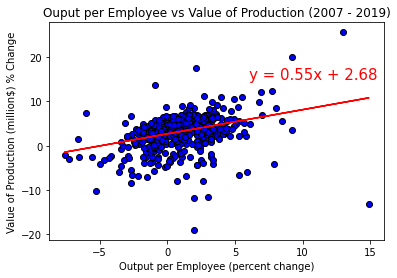

In [8]:
# Scatter plot for Output per Employee (percent change) vs value of production
# Calculating correlation coefficient and regression line
plt.scatter(output_employ, prod_value_prct, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, prod_value_prct)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, prod_value_prct)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,15),fontsize=15,color="red")

plt.title('Ouput per Employee vs Value of Production (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel('Value of Production (million$) % Change')

plt.show()


The correlation between both factors is -0.16


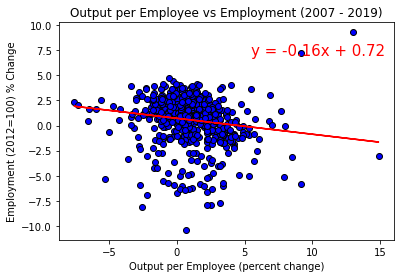

In [9]:
# Scatter plot for Output per Employee (percent change) vs employment
# Calculating correlation coefficient and regression line
plt.scatter(output_employ, employ_prct, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, employ_prct)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, employ_prct)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(5.5,7),fontsize=15,color="red")

plt.title('Output per Employee vs Employment (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel('Employment (2012=100) % Change')

plt.show()

The correlation between both factors is 0.16


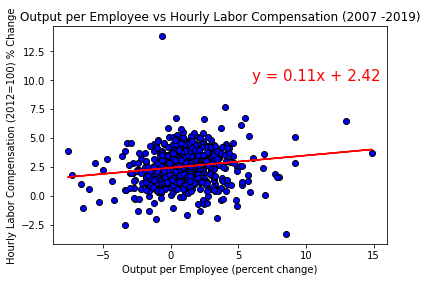

In [10]:
# Scatter plot for "Output per Employee (percent change)" vs hourly labor compensation
# Calculating correlation coefficient and regression line
plt.scatter(output_employ, hourly_labor, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, hourly_labor)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, hourly_labor)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title('Output per Employee vs Hourly Labor Compensation (2007 -2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel('Hourly Labor Compensation (2012=100) % Change')

plt.show()

The correlation between both factors is 0.16


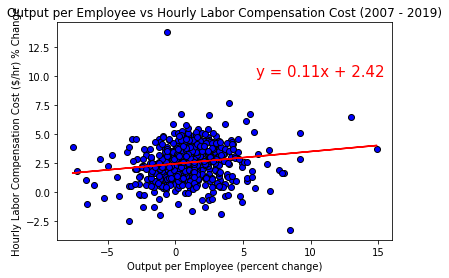

In [11]:
# Scatter plot for output per employee vs hourly labor compensation
# Calculating correlation coefficient and regression line
plt.scatter(output_employ, hour_labor_comp, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, hour_labor_comp)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, hour_labor_comp)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title('Output per Employee vs Hourly Labor Compensation Cost (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel('Hourly Labor Compensation Cost ($/hr) % Change')

plt.show()

The correlation between both factors is 0.16


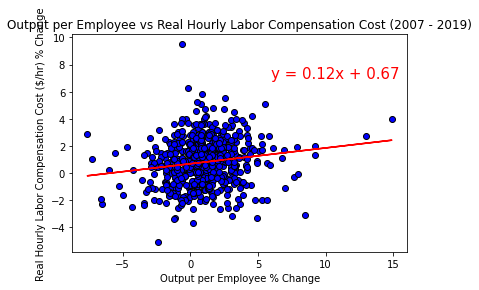

In [12]:
# Scatter plot for output per employee vs real hourly labor compensation cost
# Calculating correlation coefficient and regression line
plt.scatter(output_employ, hourly_compcost, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, hourly_compcost)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, hourly_compcost)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,7),fontsize=15,color="red")


plt.title('Output per Employee vs Real Hourly Labor Compensation Cost (2007 - 2019)')
plt.xlabel('Output per Employee % Change')
plt.ylabel('Real Hourly Labor Compensation Cost ($/hr) % Change')


plt.show()

The correlation between both factors is 0.05


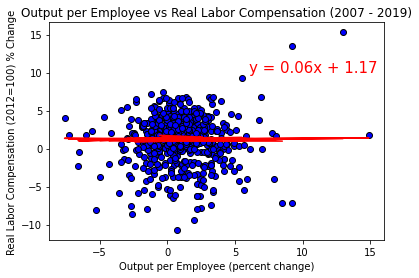

In [13]:
# Scatter plot for output per employee vs real labor compensation
# Calculating correlation coefficient and regression line
plt.scatter(output_employ, labor_comp_real, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, labor_comp_real)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, labor_comp_real)
regress_values = hourly_compcost * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title('Output per Employee vs Real Labor Compensation (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Real Labor Compensation (2012=100) % Change")


plt.show()

The correlation between both factors is 0.05


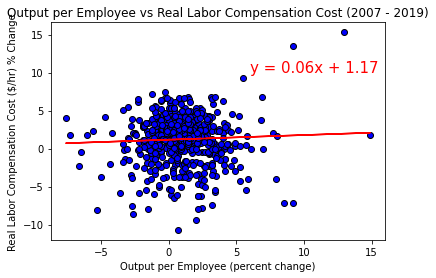

In [14]:
# Scatter plot for output per employee vs real labor compensation cost
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, labor_compcost, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, labor_compcost)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, labor_compcost)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title('Output per Employee vs Real Labor Compensation Cost (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Real Labor Compensation Cost ($/hr) % Change")


plt.show()

The correlation between both factors is -0.77


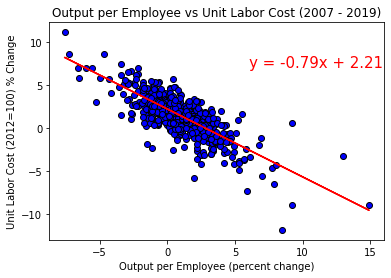

In [15]:
# Scatter plot for output per employee vs unit labor cost
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, unit_laborcost, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, unit_laborcost)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, unit_laborcost)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,7),fontsize=15,color="red")

plt.title('Output per Employee vs Unit Labor Cost (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Unit Labor Cost (2012=100) % Change")


plt.show()

The correlation between both factors is 0.04


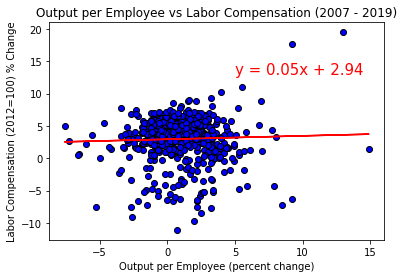

In [16]:
# Scatter plot for output per employee vs labor compensation
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, labor_comp, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, labor_comp)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, labor_comp)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(5,13),fontsize=15,color="red")

plt.title('Output per Employee vs Labor Compensation (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Labor Compensation (2012=100) % Change")


plt.show()

The correlation between both factors is 0.04


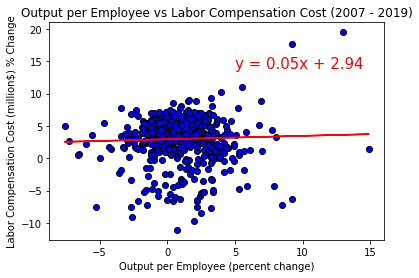

In [17]:
# Scatter plot for output per employee vs labor compensation cost
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, labor_cost, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, labor_cost)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, labor_cost)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(5,14),fontsize=15,color="red")

plt.title('Output per Employee vs Labor Compensation Cost (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Labor Compensation Cost (million$) % Change")



plt.show()

The correlation between both factors is -0.16


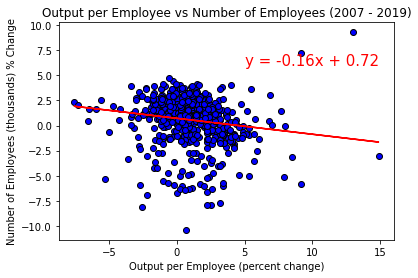

In [18]:
# Scatter plot for output per employee vs number of employees
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, num_employ, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, num_employ)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, num_employ)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(5,6),fontsize=15,color="red")

plt.title('Output per Employee vs Number of Employees (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Number of Employees (thousands) % Change")


plt.show()

The correlation between both factors is -0.04


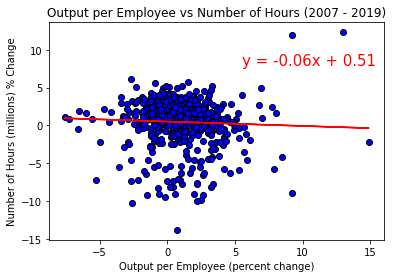

In [19]:
# Scatter plot for output per employee vs number of hours
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, num_hours, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, num_hours)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, num_hours)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(5.5,8),fontsize=15,color="red")

plt.title('Output per Employee vs Number of Hours (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Number of Hours (millions) % Change")


plt.show()

The correlation between both factors is 0.64


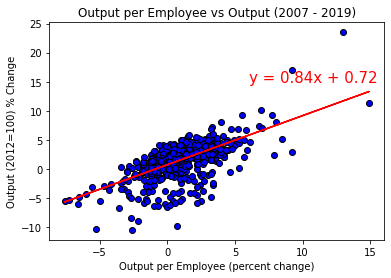

In [20]:
# Scatter plot for output per employee vs output
# Calculating correlation coefficient and regression line

plt.scatter(output_employ, output, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, output)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, output)
regress_values = output_employ * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,15),fontsize=15,color="red")

plt.title('Output per Employee vs Output (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Output (2012=100) % Change")


plt.show()

The correlation between both factors is 0.16


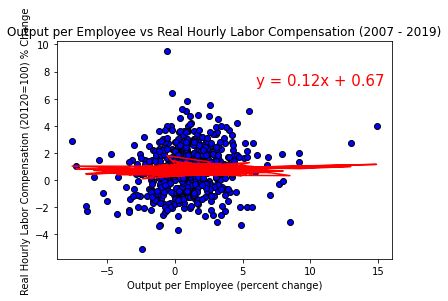

In [21]:
# Scatter plot for Output per employee vs real hourly labor compensation
# Calculating correlation coefficient and regression line

plt.scatter(output_employ,real_hour_comp, marker = "o", facecolor="blue", edgecolors = "black")
correlation = st.pearsonr(output_employ, real_hour_comp)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(output_employ, real_hour_comp)
regress_values = hourly_compcost * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(output_employ,regress_values,"r-")
plt.annotate(line_eq,(6,7),fontsize=15,color="red")

plt.title('Output per Employee vs Real Hourly Labor Compensation (2007 - 2019)')
plt.xlabel('Output per Employee (percent change)')
plt.ylabel("Real Hourly Labor Compensation (20120=100) % Change")


plt.show()